### Starting by importing Geopandas module

In [1]:
import geopandas as gpd
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

link where our shapefile is located

In [2]:
link_shp = r"data\delim parcelaire FR\2024-07-22_delim-parcellaire-aoc-shp.shp"

Reading the geodatafile with geopandas <i>gpd</i>:

In [3]:
gdf = gpd.read_file(link_shp)
gdf.head(3)

,dt,type_prod,categorie,type_denom,signe,id_app,app,id_denom,denom,insee,cvi,nomcom,insee2011,nomcom2011,id_aire,crinao,grp_name1,grp_name2,geometry
0,Angers,Vins,"Vin mousseux, Vin primeur, Vin tranquille",appellation,AOC,76,Anjou,173,Anjou,49002,"1B200, 1B200M 1, 1R200S, 1R203S, 1R203S01, 1S2...",ALLONNES,49002,ALLONNES,133,None,None,None,"MULTIPOLYGON (((476099.07 6692210.88, 476039.9..."
1,Angers,Vins,"Vin mousseux, Vin primeur, Vin tranquille",appellation,AOC,76,Anjou,173,Anjou,49003,"1B200, 1B200M 1, 1R200S, 1R203S, 1R203S01, 1S2...",TUFFALUN,"49003,49181,49230","AMBILLOU-CHATEAU,LOUERRE,NOYANT-LA-PLAINE",133,None,None,None,"MULTIPOLYGON (((445501.95 6686844.11, 445500.5..."
2,Angers,Vins,"Vin mousseux, Vin primeur, Vin tranquille",appellation,AOC,76,Anjou,173,Anjou,49007,"1B200, 1B200M 1, 1R200S, 1R203S, 1R203S01, 1S2...",ANGERS,49007,ANGERS,133,None,None,None,"MULTIPOLYGON (((430316.54 6711699.87, 430309.2..."


In [4]:
gdf.dtypes

dt              object
type_prod       object
categorie       object
type_denom      object
signe           object
id_app           int64
app             object
id_denom         int64
denom           object
insee           object
cvi             object
nomcom          object
insee2011       object
nomcom2011      object
id_aire          int64
crinao          object
grp_name1       object
grp_name2       object
geometry      geometry
dtype: object

In [5]:
len(gdf) # number of records' rows '

11764

In [6]:
gdf.shape # (rows, columns)

(11764, 19)

In [7]:
# showing all infos about the geodataframe 
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11764 entries, 0 to 11763
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   dt          11764 non-null  object  
 1   type_prod   11764 non-null  object  
 2   categorie   11764 non-null  object  
 3   type_denom  11764 non-null  object  
 4   signe       11764 non-null  object  
 5   id_app      11764 non-null  int64   
 6   app         11764 non-null  object  
 7   id_denom    11764 non-null  int64   
 8   denom       11764 non-null  object  
 9   insee       11764 non-null  object  
 10  cvi         11764 non-null  object  
 11  nomcom      11764 non-null  object  
 12  insee2011   11764 non-null  object  
 13  nomcom2011  11764 non-null  object  
 14  id_aire     11764 non-null  int64   
 15  crinao      0 non-null      object  
 16  grp_name1   0 non-null      object  
 17  grp_name2   0 non-null      object  
 18  geometry    11764 non-null  geometry
d

In [8]:
#showing the metadata #coordinates reference system
gdf.crs

<Projected CRS: IGNF:LAMB93>
Name: RGF93 Lambert 93
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993 v1
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [9]:
gdf.geom_type #showing the geometric type of data contained in the geodataframe

0        MultiPolygon
1        MultiPolygon
2        MultiPolygon
3        MultiPolygon
4        MultiPolygon
             ...     
11759    MultiPolygon
11760    MultiPolygon
11761    MultiPolygon
11762    MultiPolygon
11763    MultiPolygon
Length: 11764, dtype: object

So now, let's plot a part of our the geodata :

In [10]:
gdf_1000 = gdf.head(1000)

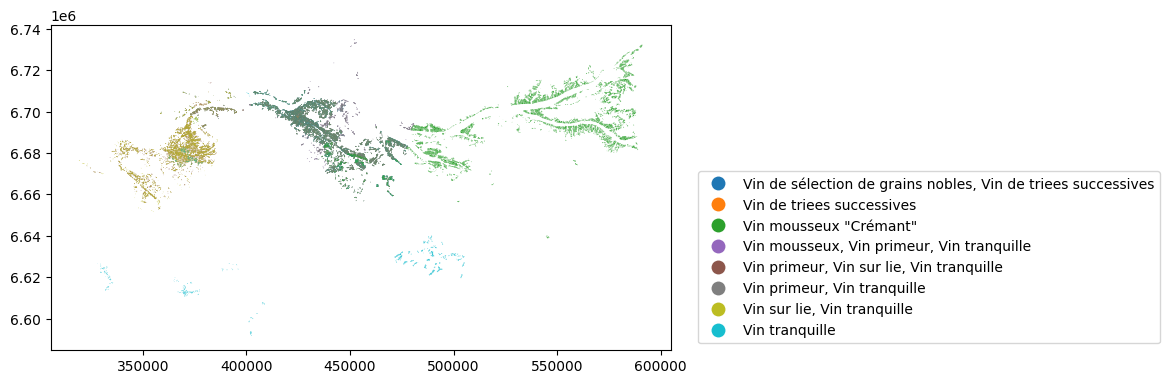

In [11]:
import matplotlib.pyplot as plt
#making the legend aside the plot:
fig,axes = plt.subplots(1,1,figsize=(8,10))
gdf_1000.plot(ax=axes, column="categorie", legend=True, legend_kwds={"loc": "lower right", "bbox_to_anchor": (1.8, 0)})
plt.show()

In [12]:
#get the unique values od each column with pandas
gdf.nunique()


dt              14
type_prod        3
categorie       28
type_denom       2
signe            1
id_app         355
app            355
id_denom      1255
denom         1261
insee         3647
cvi           1254
nomcom        3788
insee2011     3772
nomcom2011    3714
id_aire       1261
crinao           0
grp_name1        0
grp_name2        0
geometry      8426
dtype: int64

In [13]:
len(gdf['categorie'].unique())#testing the number of unique values on categroy column

28

#### Transform our geodataframe to another form like geojson :

In [14]:
gdf_1000.to_file(r"data\Output_gesjson_from_shp\output.geojson", driver="GeoJSON", encoding = "utf-8")

Reading data from CSV :

In [15]:
#Reading data from CSV :
link_to_csv = r"data\charging_station.csv"
gdf_1  = gpd.read_file(link_to_csv, encoding = "utf-8", sep = ";")
gdf_1.head(3)

DataSourceError: data\charging_station.csv: No such file or directory

In [ ]:
gdf.shape

(11764, 19)

In [ ]:
gdf_1.columns

Index(['X', 'Y', 'nom_amenageur', 'siren_amenageur', 'contact_amenageur',
       'nom_operateur', 'contact_operateur', 'telephone_operateur',
       'nom_enseigne', 'id_station_itinerance', 'id_station_local',
       'nom_station', 'implantation_station', 'adresse_station',
       'code_insee_commune', 'coordonneesXY', 'nbre_pdc', 'id_pdc_itinerance',
       'id_pdc_local', 'puissance_nominale', 'prise_type_ef', 'prise_type_2',
       'prise_type_combo_ccs', 'prise_type_chademo', 'prise_type_autre',
       'gratuit', 'paiement_acte', 'paiement_cb', 'paiement_autre',
       'tarification', 'condition_acces', 'reservation', 'horaires',
       'accessibilite_pmr', 'restriction_gabarit', 'station_deux_roues',
       'raccordement', 'num_pdl', 'date_mise_en_service', 'observations',
       'date_maj'],
      dtype='object')

In [ ]:
gdf_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14870 entries, 0 to 14869
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   X                      14870 non-null  object
 1   Y                      14870 non-null  object
 2   nom_amenageur          14870 non-null  object
 3   siren_amenageur        14870 non-null  object
 4   contact_amenageur      14870 non-null  object
 5   nom_operateur          14870 non-null  object
 6   contact_operateur      14870 non-null  object
 7   telephone_operateur    14870 non-null  object
 8   nom_enseigne           14870 non-null  object
 9   id_station_itinerance  14870 non-null  object
 10  id_station_local       14870 non-null  object
 11  nom_station            14870 non-null  object
 12  implantation_station   14870 non-null  object
 13  adresse_station        14870 non-null  object
 14  code_insee_commune     14870 non-null  object
 15  coordonneesXY      